# Tests on sequences of data from AirSim

In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
from scipy.spatial.transform import Rotation as R

import planeslam.io as io
from planeslam.extraction import pc_to_planes
from planeslam.scan import pc_to_scan

Read in airsim LiDAR and pose data

In [3]:
# Read in point cloud data
binpath = os.path.join(os.getcwd(),'..', 'data', 'airsim', 'blocks_20_samples_1', 'lidar', 'Drone0')
PC_data = io.read_lidar_bin(binpath)

In [4]:
# Read in ground-truth poses (in drone local frame)
posepath = os.path.join(os.getcwd(),'..', 'data', 'airsim', 'blocks_20_samples_1', 'poses', 'Drone0')
drone_positions, drone_orientations = io.read_poses(posepath)

Extract scans from LiDAR point clouds

In [5]:
# Extract scans and planesets
num_scans = len(PC_data)
scans = num_scans * [None]
planesets = num_scans * [None]

for i in range(num_scans):
    scans[i] = pc_to_scan(PC_data[i])
    r = R.from_quat(drone_orientations[i,:])
    scans[i].transform(r.as_matrix(), drone_positions[i,:])

    # planesets[i] = pc_to_planes(PC_data[i])
    # for p in planesets[i]:
    #     r = R.from_quat(drone_orientations[i,:])
    #     p.transform(r.as_matrix(), drone_positions[i,:])

Merge Scans

In [6]:
merge = scans[0].merge(scans[1])

vertex and face generation not yet implemented


Text(0.5, 0.5, 'Y')

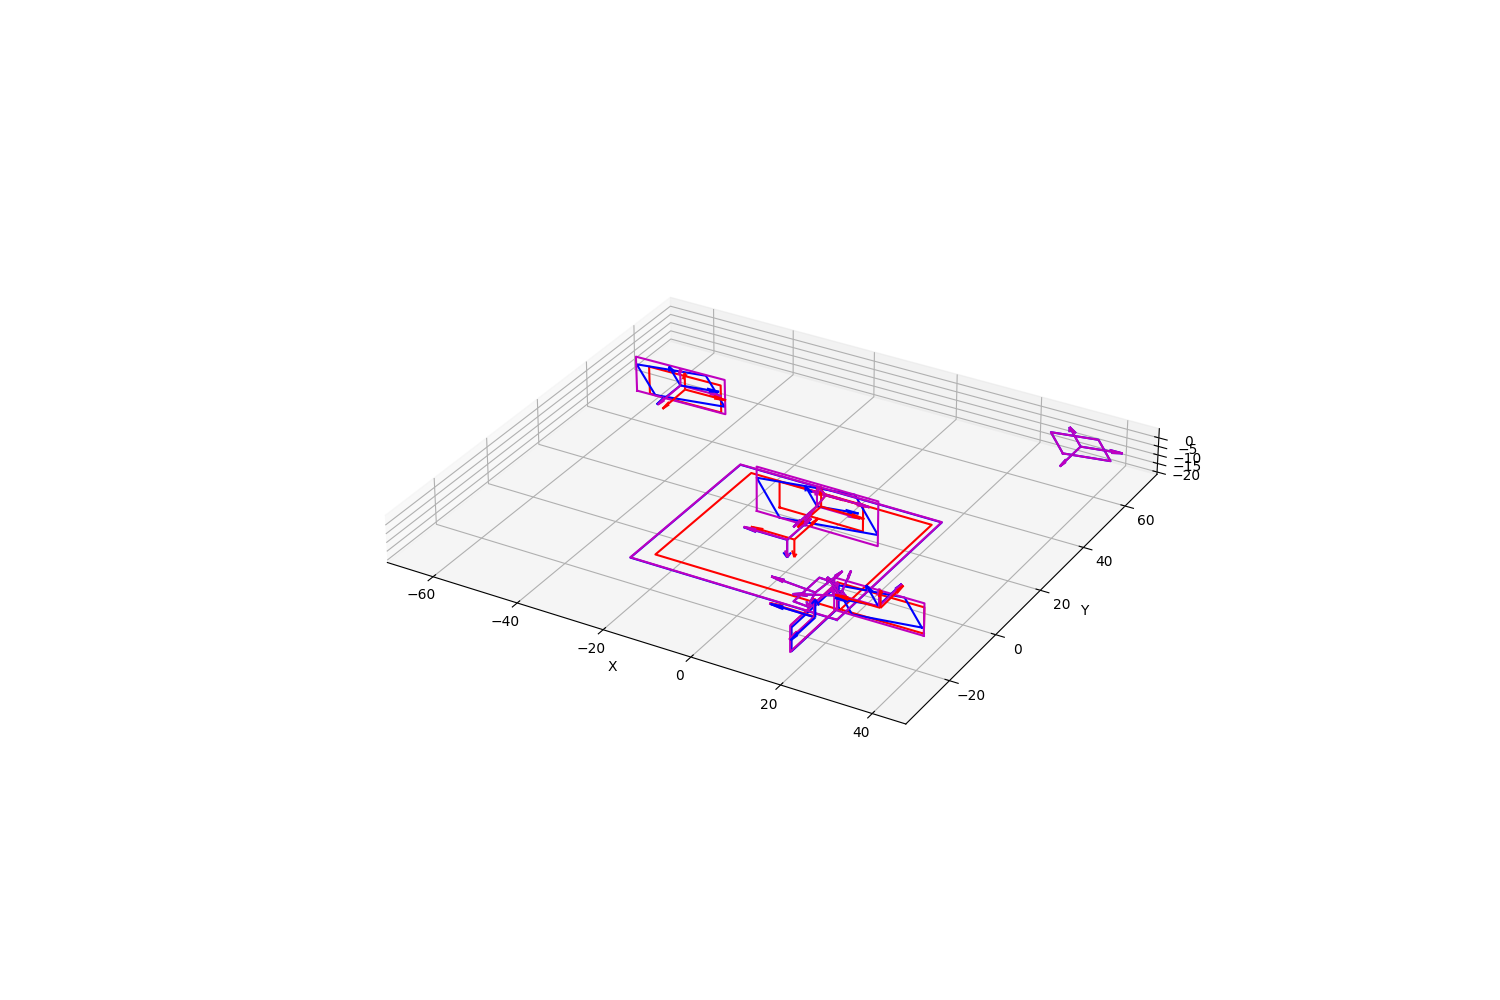

In [8]:
# Plot merge
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
colors = ['r', 'b']

for i, scan in enumerate(scans[0:2]):
    scan.plot(ax, color=colors[i], show_normals=True)

merge.plot(ax, color='m', show_normals=True)

ax.set_box_aspect((np.ptp(PC_data[0][:,0]), np.ptp(PC_data[0][:,1]), np.ptp(PC_data[0][:,2])))
ax.set_xlabel("X")
ax.set_ylabel("Y")

In [13]:
merged = scans[0]

for s in scans[1:]:
    merged = merged.merge(s)

vertex and face generation not yet implemented
vertex and face generation not yet implemented
vertex and face generation not yet implemented
vertex and face generation not yet implemented
vertex and face generation not yet implemented
vertex and face generation not yet implemented
vertex and face generation not yet implemented
vertex and face generation not yet implemented
vertex and face generation not yet implemented
vertex and face generation not yet implemented
vertex and face generation not yet implemented
vertex and face generation not yet implemented
vertex and face generation not yet implemented
vertex and face generation not yet implemented
vertex and face generation not yet implemented
vertex and face generation not yet implemented
vertex and face generation not yet implemented
vertex and face generation not yet implemented
vertex and face generation not yet implemented


Text(0.5, 0.5, 'Y')

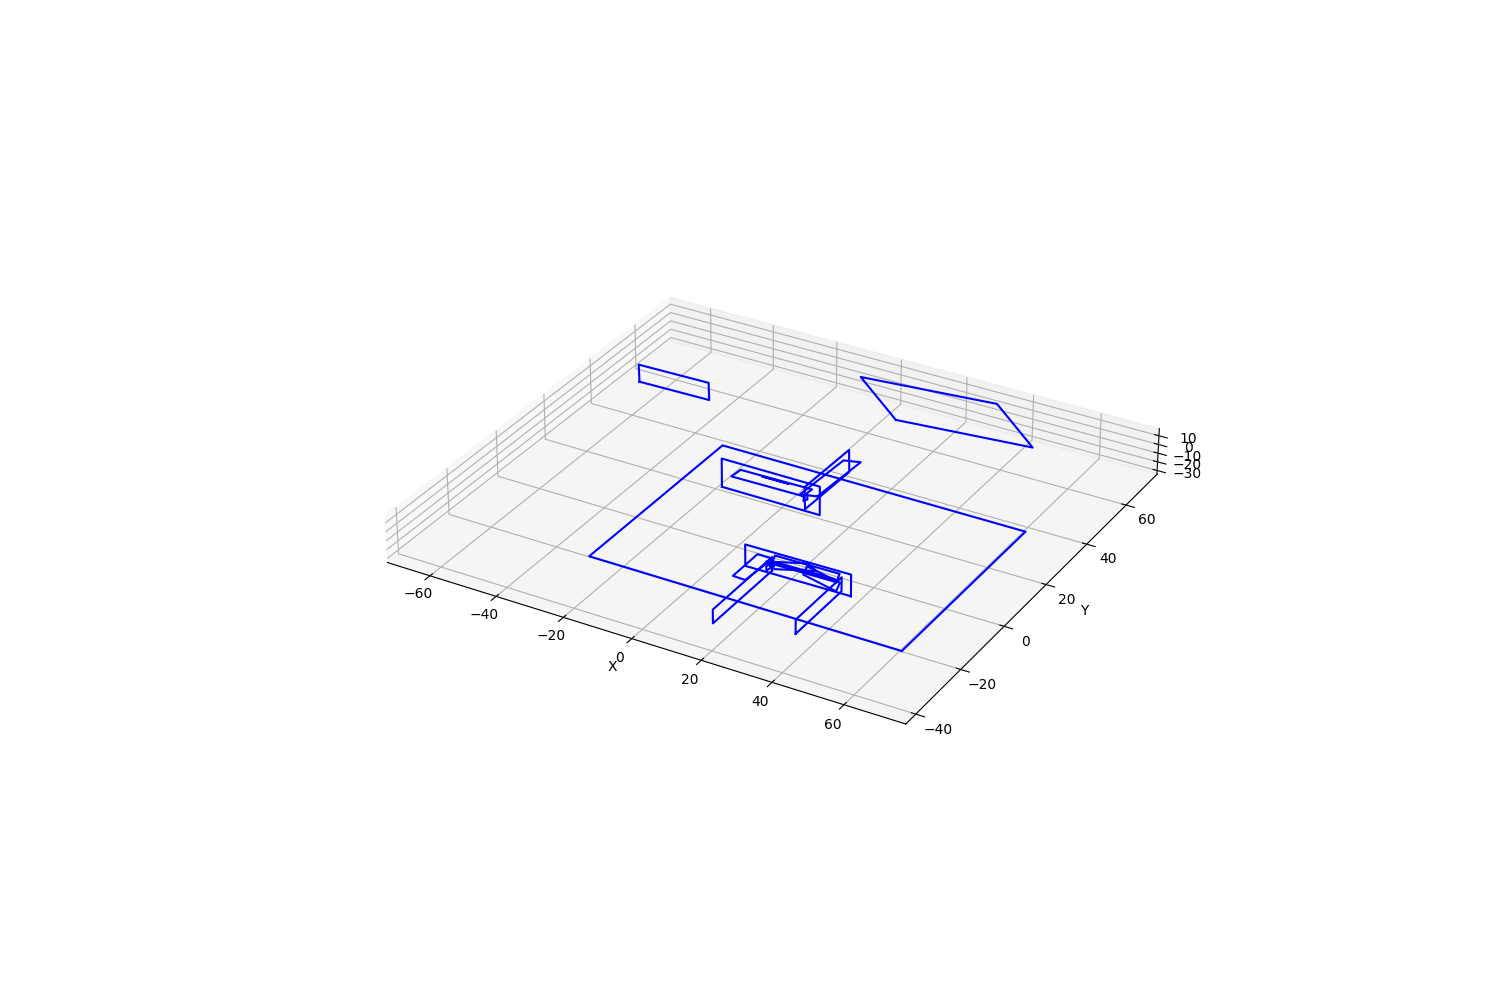

In [14]:
# Plot merge
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')

merged.plot(ax)

ax.set_box_aspect((np.ptp(PC_data[0][:,0]), np.ptp(PC_data[0][:,1]), np.ptp(PC_data[0][:,2])))
ax.set_xlabel("X")
ax.set_ylabel("Y")